# Palmer Penguins Species Classification

Predict penguin species using other variables in the dataset.

In [15]:
%pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    auc
)
import matplotlib.pyplot as plt
import palmerpenguins as pp

## Load and Prepare Data

In [17]:
df_penguins = pp.load_penguins()
df_clean = df_penguins.dropna()

y = df_clean['species']
X = df_clean.drop(columns=['species'])
X_dummies = pd.get_dummies(X, drop_first=True)

print(f"Shape: {X_dummies.shape}")
print(f"Classes: {y.unique()}")
print(f"\nClass distribution:")
print(y.value_counts())

Shape: (333, 8)
Classes: ['Adelie' 'Gentoo' 'Chinstrap']

Class distribution:
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


## Train-Test Split with Stratification

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_dummies, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training: {X_train.shape[0]}, Test: {X_test.shape[0]}")

Training: 266, Test: 67


## Model 1: kNN (k=5)

In [19]:
pipeline_knn5 = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)

pipeline_knn5.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('kneighborsclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [20]:
y_train_knn5 = pd.Series(pipeline_knn5.predict(X_train), name="Predicted")
y_test_knn5 = pd.Series(pipeline_knn5.predict(X_test), name="Predicted")

print(f"Training Accuracy: {accuracy_score(y_train, y_train_knn5):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_knn5):.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.9701


## Model 2: kNN (k=15)

In [21]:
pipeline_knn15 = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=15)
)

pipeline_knn15.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('kneighborsclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [22]:
y_train_knn15 = pd.Series(pipeline_knn15.predict(X_train), name="Predicted")
y_test_knn15 = pd.Series(pipeline_knn15.predict(X_test), name="Predicted")

print(f"Training Accuracy: {accuracy_score(y_train, y_train_knn15):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_knn15):.4f}")

Training Accuracy: 0.9962
Test Accuracy: 0.9851


## Model 3: Decision Tree (max_depth=3)

In [23]:
dt_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_3.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
y_train_dt3 = pd.Series(dt_3.predict(X_train), name="Predicted")
y_test_dt3 = pd.Series(dt_3.predict(X_test), name="Predicted")

print(f"Training Accuracy: {accuracy_score(y_train, y_train_dt3):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_dt3):.4f}")

Training Accuracy: 0.9812
Test Accuracy: 0.9552


## Model 4: Decision Tree (max_depth=7)

In [25]:
dt_7 = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_7.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
y_train_dt7 = pd.Series(dt_7.predict(X_train), name="Predicted")
y_test_dt7 = pd.Series(dt_7.predict(X_test), name="Predicted")

print(f"Training Accuracy: {accuracy_score(y_train, y_train_dt7):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_dt7):.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.9254


## Evaluating Models on Test Data

### kNN (k=5) Evaluation

In [27]:
print("Confusion Matrix (sklearn):")
print(confusion_matrix(y_test, y_test_knn5))

print("\nConfusion Matrix (crosstab):")
print(pd.crosstab(y_test, y_test_knn5, margins=True))

print(f"\nOverall Accuracy: {accuracy_score(y_test, y_test_knn5):.4f}")

Confusion Matrix (sklearn):
[[28  1  0]
 [ 1 13  0]
 [ 0  0 24]]

Confusion Matrix (crosstab):
Predicted  Adelie  Chinstrap  Gentoo  All
species                                  
Adelie          5          1       4   10
All             5          1       4   10

Overall Accuracy: 0.9701


In [28]:
print("Precision, Recall, F1-Score (one-vs-rest):")
species_classes = pipeline_knn5.classes_

for species in species_classes:
    y_test_binary = (y_test == species)
    y_pred_binary = (y_test_knn5 == species)
    
    print(f"\n{species}:")
    print(f"  Precision: {precision_score(y_test_binary, y_pred_binary):.4f}")
    print(f"  Recall:    {recall_score(y_test_binary, y_pred_binary):.4f}")
    print(f"  F1-Score:  {f1_score(y_test_binary, y_pred_binary):.4f}")

Precision, Recall, F1-Score (one-vs-rest):

Adelie:
  Precision: 0.9655
  Recall:    0.9655
  F1-Score:  0.9655

Chinstrap:
  Precision: 0.9286
  Recall:    0.9286
  F1-Score:  0.9286

Gentoo:
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000


In [29]:
print("AUC Scores (one-vs-rest):")
y_pred_proba_knn5 = pipeline_knn5.predict_proba(X_test)

for i, species in enumerate(species_classes):
    y_test_binary = (y_test == species).astype(int)
    y_score = y_pred_proba_knn5[:, i]
    print(f"{species}: {roc_auc_score(y_test_binary, y_score):.4f}")

AUC Scores (one-vs-rest):
Adelie: 0.9991
Chinstrap: 0.9987
Gentoo: 1.0000


### kNN (k=15) Evaluation

In [30]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_knn15))
print("\n", pd.crosstab(y_test, y_test_knn15, margins=True))

print(f"\nOverall Accuracy: {accuracy_score(y_test, y_test_knn15):.4f}")

Confusion Matrix:
[[28  1  0]
 [ 0 14  0]
 [ 0  0 24]]

 Predicted  Adelie  Chinstrap  Gentoo  All
species                                  
Adelie          5          1       4   10
All             5          1       4   10

Overall Accuracy: 0.9851


In [31]:
print("Precision, Recall, F1-Score:")
for species in species_classes:
    y_test_binary = (y_test == species)
    y_pred_binary = (y_test_knn15 == species)
    
    print(f"\n{species}:")
    print(f"  Precision: {precision_score(y_test_binary, y_pred_binary):.4f}")
    print(f"  Recall:    {recall_score(y_test_binary, y_pred_binary):.4f}")
    print(f"  F1-Score:  {f1_score(y_test_binary, y_pred_binary):.4f}")

Precision, Recall, F1-Score:

Adelie:
  Precision: 1.0000
  Recall:    0.9655
  F1-Score:  0.9825

Chinstrap:
  Precision: 0.9333
  Recall:    1.0000
  F1-Score:  0.9655

Gentoo:
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000


In [32]:
print("AUC Scores:")
y_pred_proba_knn15 = pipeline_knn15.predict_proba(X_test)

for i, species in enumerate(species_classes):
    y_test_binary = (y_test == species).astype(int)
    y_score = y_pred_proba_knn15[:, i]
    print(f"{species}: {roc_auc_score(y_test_binary, y_score):.4f}")

AUC Scores:
Adelie: 1.0000
Chinstrap: 1.0000
Gentoo: 1.0000


### Decision Tree (depth=3) Evaluation

In [33]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_dt3))
print("\n", pd.crosstab(y_test, y_test_dt3, margins=True))

print(f"\nOverall Accuracy: {accuracy_score(y_test, y_test_dt3):.4f}")

Confusion Matrix:
[[29  0  0]
 [ 1 13  0]
 [ 2  0 22]]

 Predicted  Adelie  Chinstrap  Gentoo  All
species                                  
Adelie          6          1       3   10
All             6          1       3   10

Overall Accuracy: 0.9552


In [34]:
print("Precision, Recall, F1-Score:")
for species in species_classes:
    y_test_binary = (y_test == species)
    y_pred_binary = (y_test_dt3 == species)
    
    print(f"\n{species}:")
    print(f"  Precision: {precision_score(y_test_binary, y_pred_binary):.4f}")
    print(f"  Recall:    {recall_score(y_test_binary, y_pred_binary):.4f}")
    print(f"  F1-Score:  {f1_score(y_test_binary, y_pred_binary):.4f}")

Precision, Recall, F1-Score:

Adelie:
  Precision: 0.9062
  Recall:    1.0000
  F1-Score:  0.9508

Chinstrap:
  Precision: 1.0000
  Recall:    0.9286
  F1-Score:  0.9630

Gentoo:
  Precision: 1.0000
  Recall:    0.9167
  F1-Score:  0.9565


In [35]:
print("AUC Scores:")
y_pred_proba_dt3 = dt_3.predict_proba(X_test)

for i, species in enumerate(species_classes):
    y_test_binary = (y_test == species).astype(int)
    y_score = y_pred_proba_dt3[:, i]
    print(f"{species}: {roc_auc_score(y_test_binary, y_score):.4f}")

AUC Scores:
Adelie: 0.9474
Chinstrap: 0.9987
Gentoo: 0.9583


### Decision Tree (depth=7) Evaluation

In [36]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_dt7))
print("\n", pd.crosstab(y_test, y_test_dt7, margins=True))

print(f"\nOverall Accuracy: {accuracy_score(y_test, y_test_dt7):.4f}")

Confusion Matrix:
[[26  3  0]
 [ 0 14  0]
 [ 2  0 22]]

 Predicted  Adelie  Chinstrap  Gentoo  All
species                                  
Adelie          5          2       3   10
All             5          2       3   10

Overall Accuracy: 0.9254


In [37]:
print("Precision, Recall, F1-Score:")
for species in species_classes:
    y_test_binary = (y_test == species)
    y_pred_binary = (y_test_dt7 == species)
    
    print(f"\n{species}:")
    print(f"  Precision: {precision_score(y_test_binary, y_pred_binary):.4f}")
    print(f"  Recall:    {recall_score(y_test_binary, y_pred_binary):.4f}")
    print(f"  F1-Score:  {f1_score(y_test_binary, y_pred_binary):.4f}")

Precision, Recall, F1-Score:

Adelie:
  Precision: 0.9286
  Recall:    0.8966
  F1-Score:  0.9123

Chinstrap:
  Precision: 0.8235
  Recall:    1.0000
  F1-Score:  0.9032

Gentoo:
  Precision: 1.0000
  Recall:    0.9167
  F1-Score:  0.9565


In [38]:
print("AUC Scores:")
y_pred_proba_dt7 = dt_7.predict_proba(X_test)

for i, species in enumerate(species_classes):
    y_test_binary = (y_test == species).astype(int)
    y_score = y_pred_proba_dt7[:, i]
    print(f"{species}: {roc_auc_score(y_test_binary, y_score):.4f}")

AUC Scores:
Adelie: 0.9220
Chinstrap: 0.9717
Gentoo: 0.9583


## ROC Curve for Adelie Species

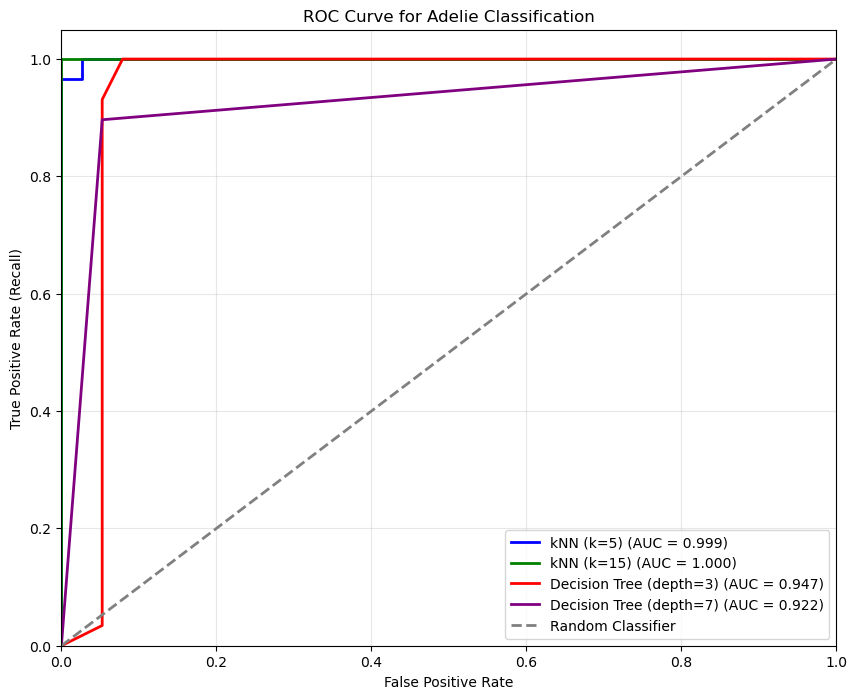

In [39]:
target_species = 'Adelie'
species_idx = list(species_classes).index(target_species)
y_test_binary = (y_test == target_species).astype(int)

plt.figure(figsize=(10, 8))

models = [
    ('kNN (k=5)', y_pred_proba_knn5),
    ('kNN (k=15)', y_pred_proba_knn15),
    ('Decision Tree (depth=3)', y_pred_proba_dt3),
    ('Decision Tree (depth=7)', y_pred_proba_dt7)
]

colors = ['blue', 'green', 'red', 'purple']

for (model_name, y_proba), color in zip(models, colors):
    y_score = y_proba[:, species_idx]
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title(f'ROC Curve for {target_species} Classification')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()